In [1]:
# ------------- import external libs  ----------------- #
import cv2
import numpy as np
from matplotlib import pyplot as plt
import time
from memory_profiler import profile
import psutil
import os
import tracemalloc
# ------------- import user libs  --------------------- #
import bay_matting_fun as bm


In [2]:
# general
# low
# image_path = 'Dataset/input_training_lowres/GT03.png'
# trimap_path = 'Dataset/trimap_training_lowres/GT03.png'
# alpha_map_ground_truth_path = 'Dataset/gt_training_lowres/GT03.png'
# high
image_path = 'Dataset/input_training_highres/GT03.png'
trimap_path = 'Dataset/trimap_training_highres/GT03.png'
alpha_map_ground_truth_path = 'Dataset/gt_training_highres/GT03.png'
# constant
alpha_map_path = 'AlphaMap.png'

In [3]:



# ------------- complexity estimation begin ----------- #
tracemalloc.start()
start_time = time.time()
# ------------- estimate function begin --------------- #
AlphaMap = bm.bayesian_matting(image_path, trimap_path, oriVar=8, Iteration=10)
# ------------- estimate function  end  --------------- #
# calculate memory consumption
snapshot = tracemalloc.take_snapshot()
stats = snapshot.statistics('lineno')
total_memory = sum(stat.size for stat in stats)
print(f"Total memory usage: {total_memory} bytes")
tracemalloc.stop()
# calculate time consumption
elapsed_time = time.time() - start_time
print(f"Elapsed time: {elapsed_time} seconds")
# ------------- complexity estimation end ------------- #


# save alpha map output

cv2.imwrite(alpha_map_path, AlphaMap)
print("Alpha Map saved to:", alpha_map_path)

# display alpha map
plt.figure(figsize=(6, 6))
plt.imshow(AlphaMap, cmap='gray')
plt.title("Alpha Map")
plt.axis('off')
plt.show()

KeyboardInterrupt: 

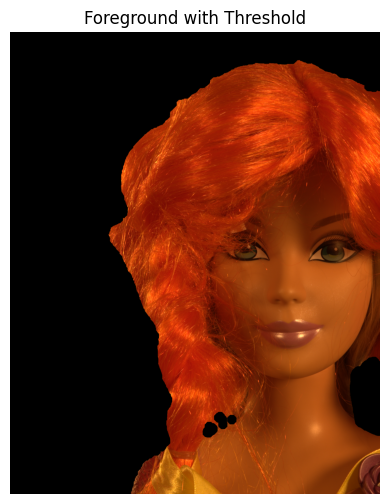

Total memory usage: 17017825 bytes
Elapsed time: 0.4930388927459717 seconds


In [ ]:


# ------------- complexity estimation begin ----------- #
tracemalloc.start()
start_time = time.time()
# ------------- estimate function begin --------------- #
bm.show_foreground_with_threshold(image_path, trimap_path, threshold=0.96)
# ------------- estimate function  end  --------------- #
# calculate memory consumption
snapshot = tracemalloc.take_snapshot()
stats = snapshot.statistics('lineno')
total_memory = sum(stat.size for stat in stats)
print(f"Total memory usage: {total_memory} bytes")
tracemalloc.stop()
# calculate time consumption
elapsed_time = time.time() - start_time
print(f"Elapsed time: {elapsed_time} seconds")
# ------------- complexity estimation end ------------- #

In [ ]:
# accuracy estimation
# MSE estimation


# Calculate MSE
mse_value = bm.calculate_alpha_mse(alpha_map_path, alpha_map_ground_truth_path)
print("Mean Squared Error (MSE):", mse_value)


Mean Squared Error (MSE): 0.049846344


In [ ]:
# PSNR estimation
# Load the images


# Calculate PSNR
psnr_value = bm.calculate_psnr(alpha_map_path, alpha_map_ground_truth_path)
print("PSNR:", psnr_value)

PSNR: 13.023666923340071
